<a href="https://colab.research.google.com/github/Arminsbss/Predicting-Academic-Performance/blob/Feature-Selection/Predicting_Academic_Performance_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.xlsx to dataset.xlsx
User uploaded file "dataset.xlsx" with length 115015 bytes


In [ ]:
data

,Address,F.S,P.C.S,M.E,F.E,M.J,F.J,HTS trave ltime,DST,Failures,E.C,Attended nursery school,Wants to take higher education,Internet access at home,In a relationship,Going out with friends,Current health status,No of absences from class in a month,Grade at Class 8,9th Class first term Grade,9th Class Second term Grade,Quality of family relationships,Gender
0,Urban,0,1,1,1,1,1,2,0,0,1,1,1,1,0,0,0,0,93,93,93,2,0
1,Urban,0,0,3,1,0,1,1,0,0,1,0,1,1,0,1,2,0,83,87,83,2,0
2,Rural,0,1,0,3,0,1,0,2,0,0,1,1,1,0,0,0,0,83,83,87,2,0
3,Rural,0,1,3,3,0,1,1,0,0,1,1,1,1,0,1,0,0,93,93,93,0,0
4,Urban,0,1,3,0,0,1,0,0,0,1,1,1,1,0,0,2,0,93,83,87,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,Rural,1,0,0,2,1,0,0,2,1,0,0,0,0,1,0,2,1,93,90,90,0,1
1199,Urban,1,1,0,3,1,1,0,2,1,1,0,0,1,1,1,0,0,90,90,90,0,0
1200,Urban,1,1,3,3,0,0,1,0,1,1,0,0,0,1,1,1,2,83,83,90,1,1
1201,Rural,0,0,2,0,1,0,2,0,1,1,1,0,0,1,1,0,1,87,90,83,0,1


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
uploaded
import pandas as pd
data=pd.read_excel('dataset.xlsx')  

In [ ]:

data["P.C.S"] = data["P.C.S"].astype('category')
data["P.C.S"] = data["P.C.S"].cat.codes

data["HTS trave ltime"] = data["HTS trave ltime"].astype('category')
data["HTS trave ltime"] = data["HTS trave ltime"].cat.codes

data["DST"] = data["DST"].astype('category')
data["DST"] = data["DST"].cat.codes

data.replace(['Yes', 'No'],[1,0], inplace=True)

data["Current health status "] = data["Current health status "].astype('category')
data["Current health status "] = data["Current health status "].cat.codes

data["No of absences from class in a month"] = data["No of absences from class in a month"].astype('category')
data["No of absences from class in a month"] = data["No of absences from class in a month"].cat.codes

data.replace(['A', 'A+','B','B+','C','D','F'],[90,93,83,87,73,63,50], inplace=True)

data["Quality of family relationships"] = data["Quality of family relationships"].astype('category')
data["Quality of family relationships"] = data["Quality of family relationships"].cat.codes

data.replace(['Male', 'Female'],[1,0], inplace=True)

data["F.S"] = data["F.S"].astype('category')
data["F.S"] = data["F.S"].cat.codes

data["M.E"] = data["M.E"].astype('category')
data["M.E"] = data["M.E"].cat.codes

data["F.E"] = data["F.E"].astype('category')
data["F.E"] = data["F.E"].cat.codes

In [ ]:
data = data.drop(labels=range(1201, 1203), axis=0)

In [ ]:
data.shape
# data

(1053, 23)

In [ ]:
feature_selection=['F.S', 'P.C.S', 'M.E', 'F.E', 'M.J', 'F.J', 'HTS trave ltime', 'DST',
       'Failures', 'E.C', 'Attended nursery school ',
       'Wants to take higher education ', 'Internet access at home ',
       'In a relationship ', 'Going out with friends',
       'Current health status ', 'No of absences from class in a month',
       'Grade at Class 8', '9th Class first term Grade',
        'Quality of family relationships',
       'Gender']

In [ ]:
feature_selection=['F.S','P.C.S', 'M.E', 'F.E', 'M.J', 'F.J', 'HTS trave ltime', 'DST',
       'Wants to take higher education ', 'Internet access at home ',
       'In a relationship ', 'Going out with friends',
       'Current health status ', 'No of absences from class in a month',
       'Grade at Class 8', '9th Class first term Grade',
        'Quality of family relationships']

In [ ]:
X = data[feature_selection] # Features
y = data['9th Class Second term Grade'] # Target variable
# print(X)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

array=[]
for j in range(120):
  array.append(j*10)
array.pop(0)
# print(array)
for i in array:
  # if i>1100:
  #   continue
  # data=pd.read_excel('dataset.xlsx')  
  # data = data.drop(range(i,i+10))
  data_new1=data[:i]
  data_new2=data[i+10:]
  data_new2=data_new1.append(data_new2)
  X = data_new2[feature_selection] # Features
  y = data_new2['9th Class Second term Grade'] # Target variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  clf = DecisionTreeClassifier(max_depth=3)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  if metrics.accuracy_score(y_test, y_pred)<0.35:
    data = data.drop(range(i,i+10))
    print(i," ,Accuracy:",metrics.accuracy_score(y_test, y_pred))

10  ,Accuracy: 0.3407821229050279
20  ,Accuracy: 0.3323943661971831
30  ,Accuracy: 0.3494318181818182
40  ,Accuracy: 0.335243553008596
50  ,Accuracy: 0.34971098265895956
60  ,Accuracy: 0.29737609329446063
70  ,Accuracy: 0.3235294117647059
160  ,Accuracy: 0.32344213649851633
170  ,Accuracy: 0.32335329341317365
730  ,Accuracy: 0.3081570996978852
740  ,Accuracy: 0.3475609756097561
750  ,Accuracy: 0.3261538461538461
780  ,Accuracy: 0.3447204968944099
790  ,Accuracy: 0.34169278996865204
1070  ,Accuracy: 0.335423197492163


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#split dataset in features and target variable
# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(recall_score(clf.predict(X_test), y_test, average=None))
print(precision_score(clf.predict(X_test), y_test, average=None))

Accuracy: 0.370253164556962
[0.         0.         0.25       0.         0.         0.35344828
 0.51923077]
[0.         0.         0.30769231 0.         0.         0.83673469
 0.36      ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


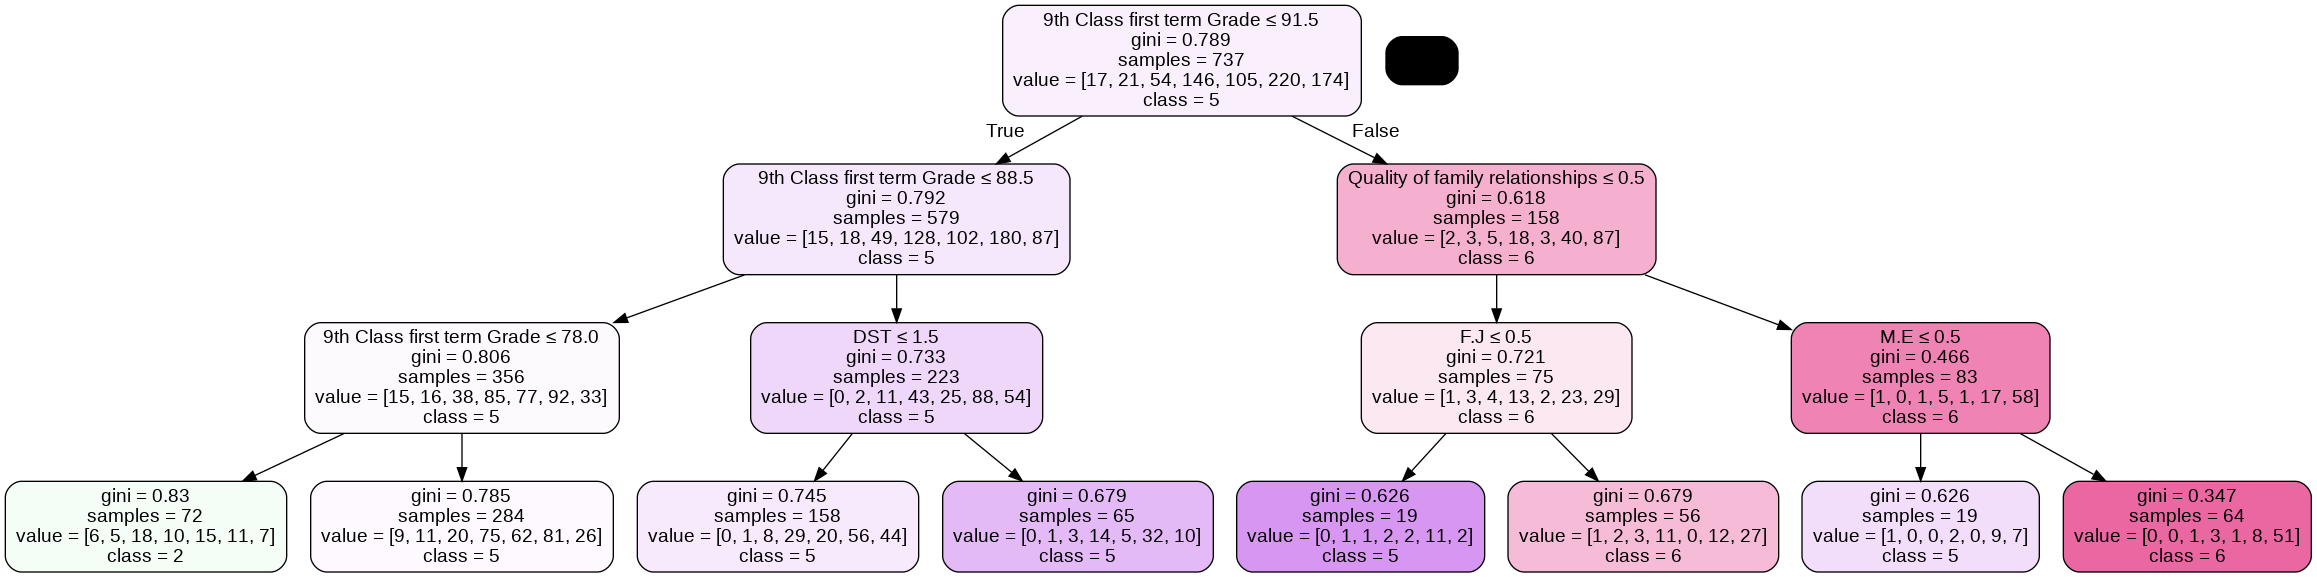

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_selection,class_names=['0','1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(hidden_layer_sizes=(100),random_state=1, max_iter=1000,activation='relu').fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(recall_score(clf.predict(X_test), y_test, average=None))
print(precision_score(clf.predict(X_test), y_test, average=None))

0.31645569620253167
[0.         0.         0.11111111 0.25       0.09090909 0.31818182
 0.375     ]
[0.         0.         0.03846154 0.03921569 0.02040816 0.64285714
 0.44      ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#bagging
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_test, y_test)
print(clf.score(X_test, y_test))
print(recall_score(clf.predict(X_test), y_test, average=None))
print(precision_score(clf.predict(X_test), y_test, average=None))

0.310126582278481
[0.         0.         0.         0.         0.         0.31012658
 0.        ]
[0. 0. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#adaboost
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_test, y_test)
print(clf.score(X_test, y_test))
print(recall_score(clf.predict(X_test), y_test, average=None))
print(precision_score(clf.predict(X_test), y_test, average=None))

0.3670886075949367
[0.57142857 0.16666667 0.64285714 0.2027027  0.33333333 0.48611111
 0.3877551 ]
[0.57142857 0.2        0.34615385 0.29411765 0.26530612 0.35714286
 0.50666667]


In [ ]:
#Voting
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
np.array_equal(eclf1.named_estimators_.lr.predict(X),eclf1.named_estimators_['lr'].predict(X))
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')
eclf2 = eclf2.fit(X, y)
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,1,1],flatten_transform=True)
eclf3 = eclf3.fit(X, y)
print(" ")
print(eclf1.score(X, y),eclf2.score(X, y),eclf3.score(X, y))
print(recall_score(eclf3.predict(X_test), y_test, average=None))
print(precision_score(eclf3.predict(X_test), y_test, average=None))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 
0.5061728395061729 0.8784425451092118 0.7359924026590693
[1.         1.         0.84615385 0.94871795 0.96       0.61111111
 0.7032967 ]
[0.42857143 0.1        0.42307692 0.7254902  0.48979592 0.89795918
 0.85333333]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
